<a href="https://colab.research.google.com/github/soumo99/AI_ML_Projects/blob/main/Bank_churn_analysis_report_lazyclassifier_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset - https://www.kaggle.com/code/prathameshgadekar/bankchurn-eda-and-prediction-using-lazy-classifier/data

Problem Statement - We are given the dataset about bank information of around 10000 customers and also given if they have churned or not. Our task is to build a ML model such that we can predict if a customer is going to churn or not.
We are going to use LazyClassifier which has around 29 pre-trained models which will help us find out the best model on basis of accuracy and time taken.

In [1]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install gitly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')
import plotly.express as px # contains functions that can create entire figures at once , open source plotting library
import missingno as msno # Python library for the exploratory visualization of missing data

In [4]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [5]:
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
data.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [8]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [10]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

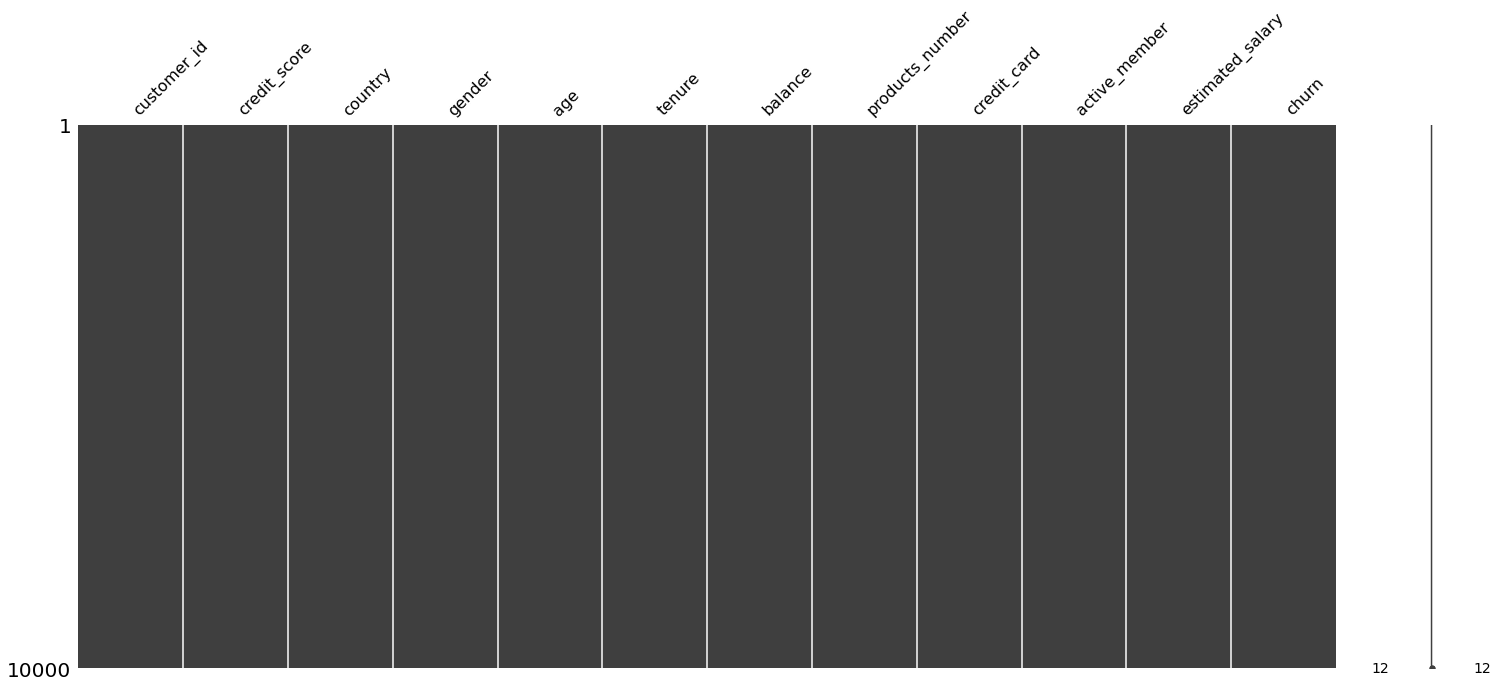

In [11]:
msno.matrix(data)

OBSERVATION :
There are total of 12 columns and 10000 rows in data.
* Dataset contains no missing value.
* We drop Customer ID feature as it is of no use.
* Churn is the Target Variable.
* The data is of people from 3 countries, which are France,Germany and Spain.
* There are a total of 110000 (10000 x 11) observations.

Data cleaning 

Customer ID - Customer ID is randomly allocated to a customer and does not depend on anything. Since It is useless, we will drop it. This will reduce the Time taken by model and will also boost accuracy significantly.

In [12]:
data.drop(['customer_id'],axis=1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Exploratory Data Analysis

In [13]:
features = data.keys()
features = features.drop('churn')
data.groupby('churn')[features].mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [14]:
data.groupby('churn')[features].median()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,,
0,15691543.0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,15688963.0,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


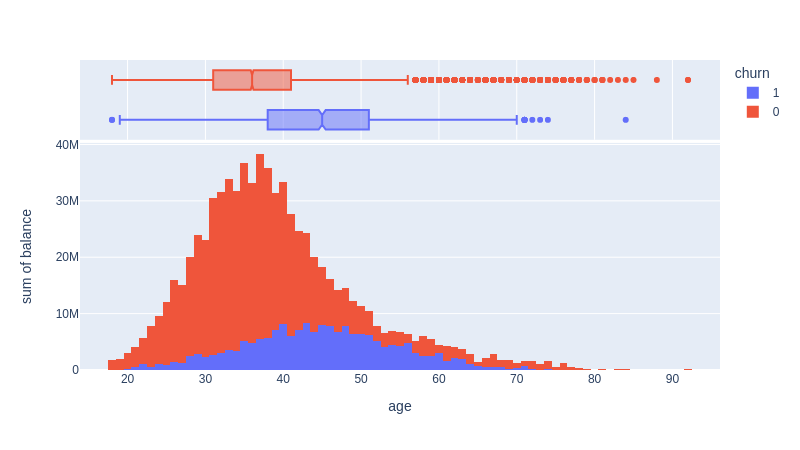

In [15]:
figure = px.histogram(data, x = 'age', y = 'balance', color = 'churn',
                      marginal = 'box', hover_data = data.columns)

gitly.show(figure)

Observation -  It is observed that customer with sum of balance less than 9M are churned of varying age groups

([<matplotlib.patches.Wedge at 0x7f942e9167d0>,
 [Text(0.8823431426537007, 0.656864201043101, 'Churned'),
  Text(-0.8823431426537008, -0.6568642010431008, 'Not Churned')],
 [Text(0.48127807781110943, 0.35828956420532776, '20.37%'),
  Text(-0.4812780778111095, -0.3582895642053277, '79.63%')])

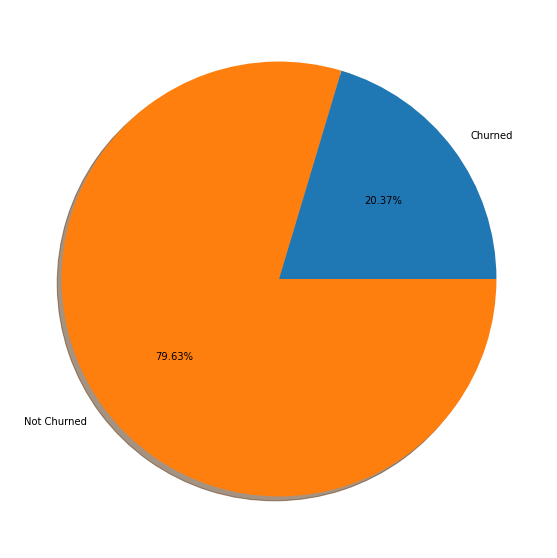

In [16]:
plt.figure(figsize = (15,10))
size_data = [data.churn[data['churn']==1].count() , data.churn[data['churn']==0].count()]
labels = ['Churned', 'Not Churned']
plt.pie(size_data, labels = labels, shadow = True, autopct = '%1.2f%%')
 

In [17]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Percentage of Customer data churned in the above 3 countries

In [18]:
# -------------- FRANCE -------------------

churned_France = data.churn[(data.country == 'France') & (data.churn == 1)].count() #number of churns data
count_France = data.churn[(data.country == 'France')].count() # total number of cusotmer data in France 
print('The percentage count of churned customer in France : ', churned_France * 100 / count_France , '%')

# -------------- GERMANY -------------------

churned_Germany = data.churn[(data.country == 'Germany') & (data.churn == 1)].count()#number of churns data
count_Germany = data.churn[(data.country == 'Germany')].count()# total number of cusotmer data in France 
print('The percentage count of churned customer in Germany : ', churned_Germany * 100 / count_Germany , '%')

# -------------- SPAIN -------------------

churned_Spain = data.churn[(data.country == 'Spain') & (data.churn == 1)].count()#number of churns data
count_Spain = data.churn[(data.country == 'Spain')].count()# total number of cusotmer data in France 
print('The percentage count of churned customer in Spain : ', churned_Spain * 100 / count_Spain , '%')


The percentage count of churned customer in France :  16.15476665337056 %
The percentage count of churned customer in Germany :  32.44320446392985 %
The percentage count of churned customer in Spain :  16.67339523617279 %


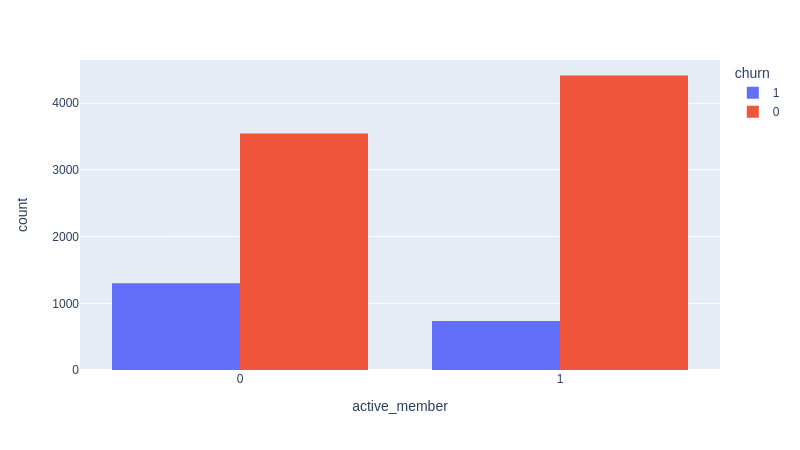

<Figure size 1080x720 with 0 Axes>

In [19]:
plt.figure(figsize = (15,10))
fig = px.histogram(data , x = 'active_member',color = 'churn', barmode = 'group') #In group mode bars are placed beside each other 
gitly.show(fig)

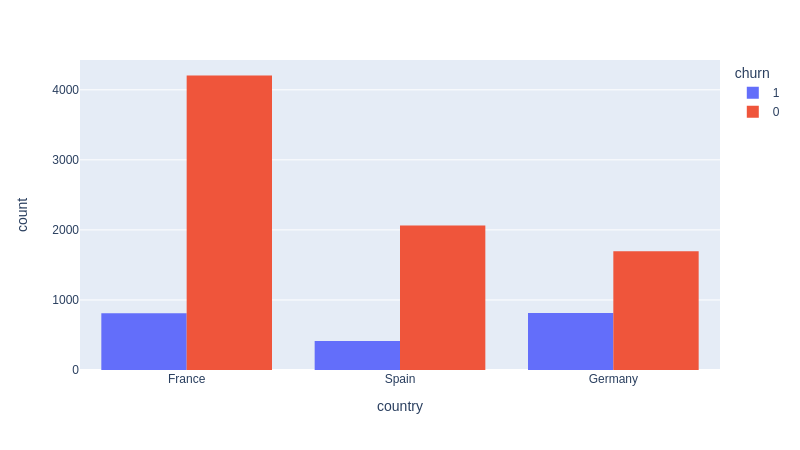

<Figure size 1080x720 with 0 Axes>

In [20]:
plt.figure(figsize = (15,10))
fig = px.histogram(data , x = 'country',color = 'churn', barmode = 'group')
gitly.show(fig)

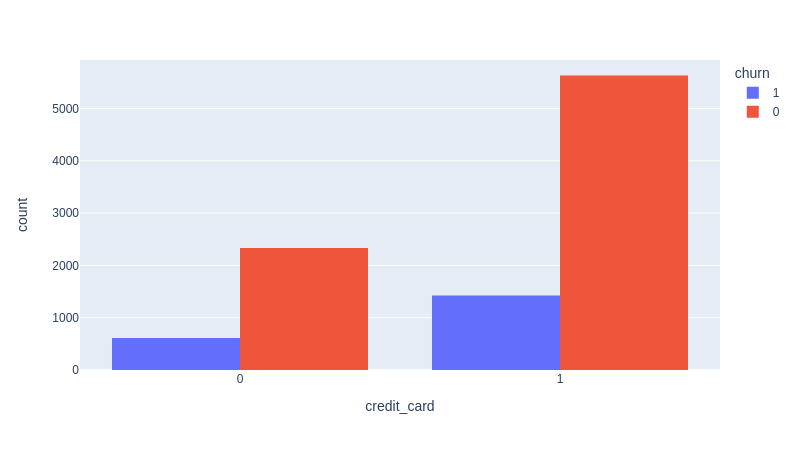

<Figure size 1080x720 with 0 Axes>

In [21]:
plt.figure(figsize = (15,10))
fig = px.histogram(data , x = 'credit_card',color = 'churn', barmode = 'group')
gitly.show(fig)

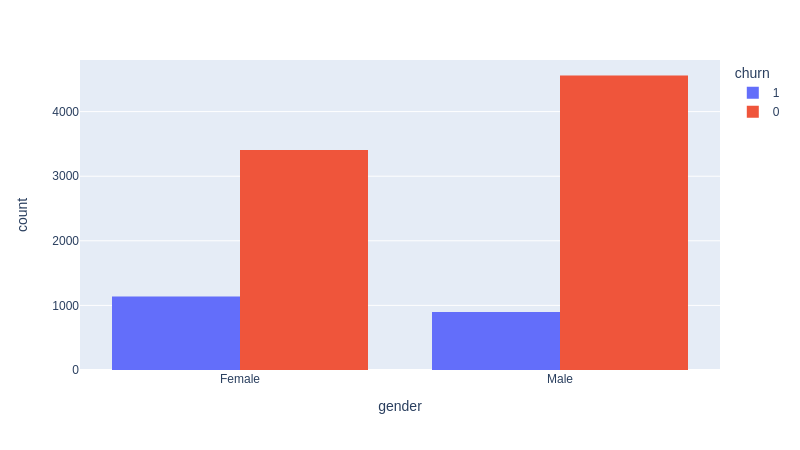

<Figure size 1080x720 with 0 Axes>

In [22]:
plt.figure(figsize = (15,10)) 
fig = px.histogram(data , x = 'gender',color = 'churn', barmode = 'group')
gitly.show(fig)

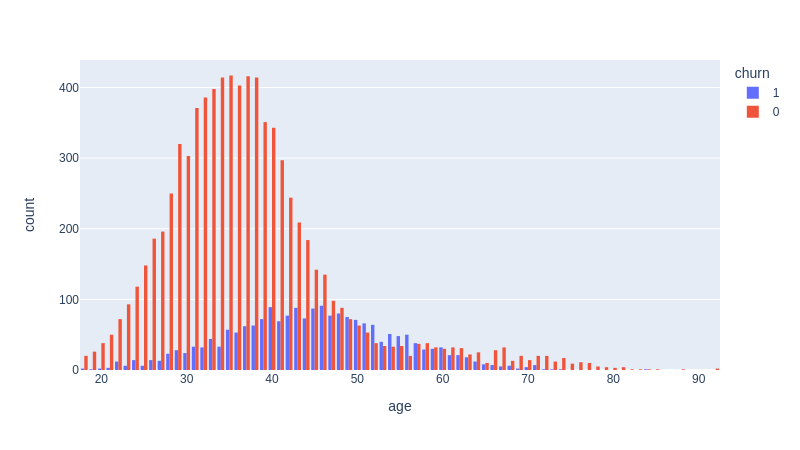

<Figure size 1080x720 with 0 Axes>

In [23]:
plt.figure(figsize = (15,10)) 
fig = px.histogram(data , x = 'age',color = 'churn', barmode = 'group')
gitly.show(fig)

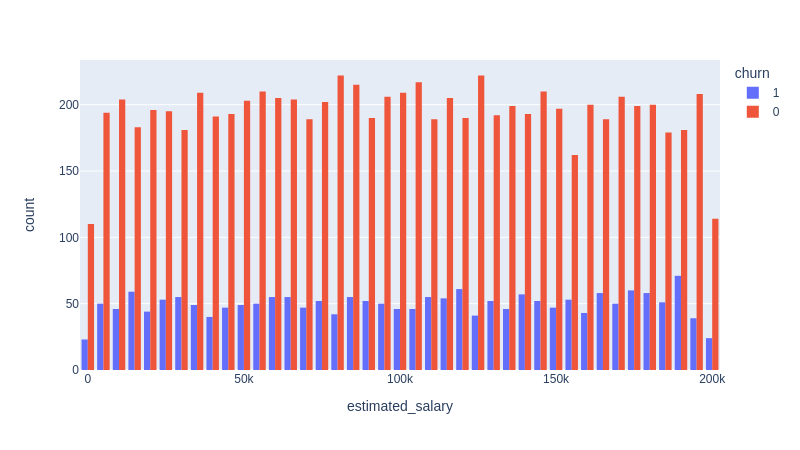

<Figure size 1080x720 with 0 Axes>

In [24]:
plt.figure(figsize = (15,10)) 
fig = px.histogram(data , x = 'estimated_salary',color = 'churn', barmode = 'group')
gitly.show(fig)

HeatMap Analysis:
The following HeatMap will tell us the correlation between all the attributes

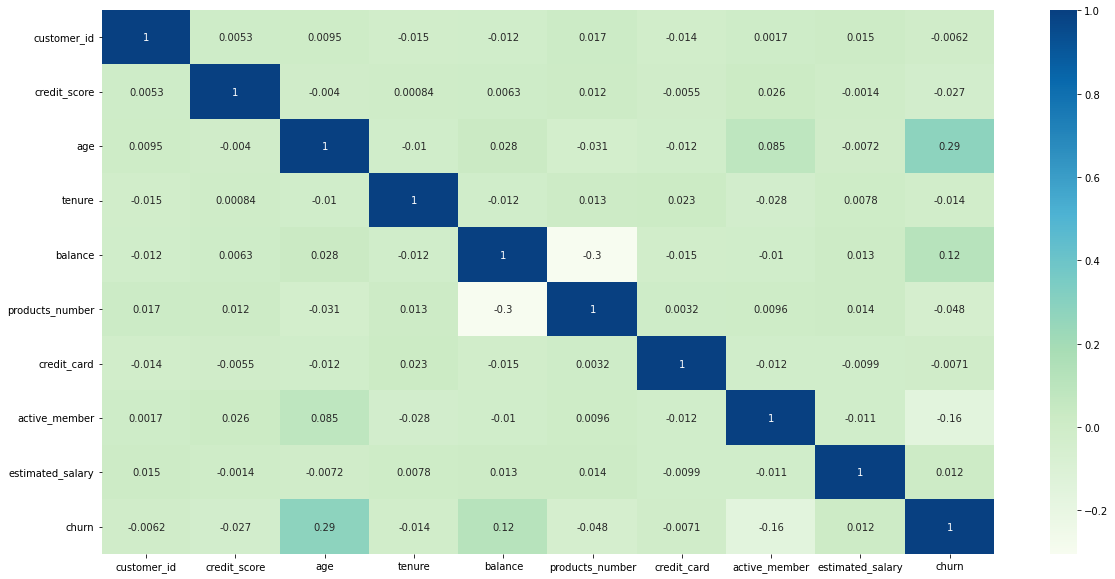

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data=data.corr(), annot=True,cmap = "GnBu")

OBSERVATIONS - 


1.   Around 20% of the customer have churned 
2.   Age has the highest positive correlation with the Churned Customers. Hence we can say that older customers are more likely to churn than the younger ones.
3.  Females have churned more than Males.
4.  Customers with credit card have churned more than people who do not have it .
5.  People who are active member of bank have churned less than those who are'nt.
6.  Estimated salary between 187.5k - 192.5k are more likely to get churned than others .
7. The percentage of German cusotmer churned is more than Spain and France .







Model Building 

Step - 1: converting the Categorical data to numerical data
Step - 2: Implementing LazyClassifier and compare every model based on the time taken and accuracy of each model.

In [26]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [27]:
data['country'] = data['country'].map({'France':1,'Spain':2,'Germany':3})

In [28]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
data['gender'] = data['gender'].map({'Male':1,'Female':2})

In [30]:
#Dividing the dataset between independent and dependent varibales 
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [31]:
X

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,1,2,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,2,41,1,83807.86,1,0,1,112542.58
2,15619304,502,1,2,42,8,159660.80,3,1,0,113931.57
3,15701354,699,1,2,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,2,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,1,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,1,2,36,7,0.00,1,0,1,42085.58
9998,15682355,772,3,1,42,3,75075.31,2,1,0,92888.52


In [32]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [33]:
#Splitting the dataset between training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [34]:
X_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
7389,15676909,667,2,2,34,5,0.00,2,1,0,163830.64
9275,15749265,427,3,1,42,1,75681.52,1,1,1,57098.00
2995,15582492,535,1,2,29,2,112367.34,1,1,0,185630.76
5316,15780386,654,2,1,40,5,105683.63,1,1,0,173617.09
356,15611759,850,2,2,57,8,126776.30,2,1,1,132298.49
...,...,...,...,...,...,...,...,...,...,...,...
9225,15584928,594,3,2,32,4,120074.97,2,1,1,162961.79
4859,15647111,794,2,2,22,4,114440.24,1,1,1,107753.07
3264,15574372,738,1,1,35,5,161274.05,2,1,0,181429.87
9845,15664035,590,2,2,38,9,0.00,2,1,1,148750.16


In [35]:
X_test

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9394,15615753,597,3,2,35,8,131101.04,1,1,1,192852.67
898,15654700,523,1,2,40,2,102967.41,1,1,0,128702.10
2398,15633877,706,2,2,42,8,95386.82,1,1,1,75732.25
5906,15745623,788,1,1,32,4,112079.58,1,0,0,89368.59
2343,15765902,706,3,1,38,5,163034.82,2,1,1,135662.17
...,...,...,...,...,...,...,...,...,...,...,...
1037,15631054,625,1,2,24,1,0.00,2,1,1,180969.55
2899,15810944,586,1,2,35,7,0.00,2,1,0,70760.69
9549,15772604,578,2,1,36,1,157267.95,2,1,0,141533.19
2740,15787699,650,3,1,34,4,142393.11,1,1,1,11276.48


In [36]:
#Scaling down the values 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train

array([[-0.20216686,  0.16958176,  0.31701997, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 0.80704397, -2.30455945,  1.52644283, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.51908128, -1.19119591, -0.89240289, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-1.63233785,  0.9015152 , -0.89240289, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.38173152, -0.62420521,  0.31701997, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.37508365, -0.28401079,  1.52644283, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [38]:
X_test

array([[-1.05516175, -0.55204276,  1.52644283, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.51193473, -1.31490297, -0.89240289, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.80237087,  0.57162971,  0.31701997, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [ 1.13257291, -0.74791227,  0.31701997, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.34311575, -0.00566991,  1.52644283, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-1.56467681, -0.79945688,  1.52644283, ...,  0.64259497,
        -1.03227043,  1.61255917]])

Model Implementation 

LazyPredict is an open-source python library that helps to semi-automate your Machine Learning Task. It can build multiple models without writing much code and helps understand which models work better for the processed dataset without requiring any parameter tuning.


In [39]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings('ignore')

model_clf = LazyClassifier(verbose = 0 , ignore_warnings = True, custom_metric = None, classifiers = 'all')
models, predictions = model_clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:31<00:00,  1.07s/it]


In [40]:
#Printing all the models along with the performce data
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.86               0.75     0.75      0.86   
AdaBoostClassifier                 0.86               0.74     0.74      0.85   
RandomForestClassifier             0.87               0.73     0.73      0.86   
XGBClassifier                      0.87               0.73     0.73      0.86   
ExtraTreesClassifier               0.86               0.72     0.72      0.85   
BaggingClassifier                  0.85               0.71     0.71      0.84   
SVC                                0.87               0.71     0.71      0.85   
DecisionTreeClassifier             0.79               0.70     0.70      0.79   
NearestCentroid                    0.68               0.68     0.68      0.71   
KNeighborsClassifier               0.83               0.68     0.68      0.82   
QuadraticDiscriminantAnalysi

Visualizing the Accuracy of Diff Classification models peformed -



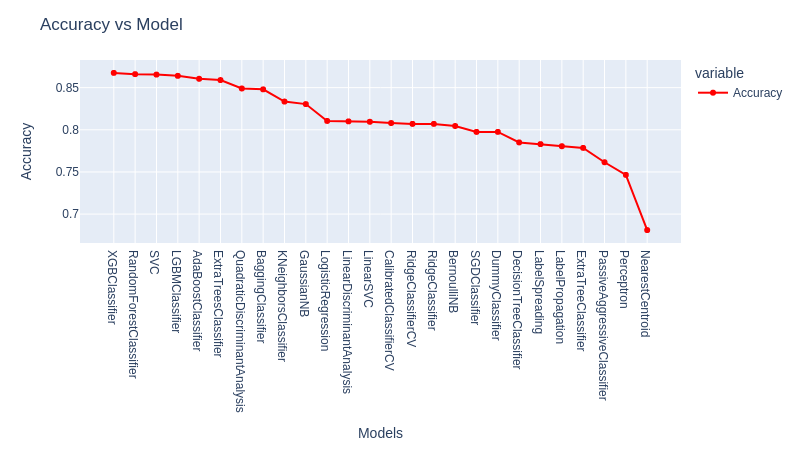

In [41]:
models.sort_values(by = 'Accuracy', inplace = True, ascending = False)
line = px.line(data_frame = models, y = ['Accuracy'], markers = True)
line.update_xaxes(title = 'Models', rangeslider_visible = False)
line.update_yaxes(title = 'Accuracy')
line.update_traces(line_color = 'red')
line.update_layout(showlegend = True, title = {'text': 'Accuracy vs Model'})

gitly.show(line)

Visualizing the Time Taken of Diff Classification models peformed

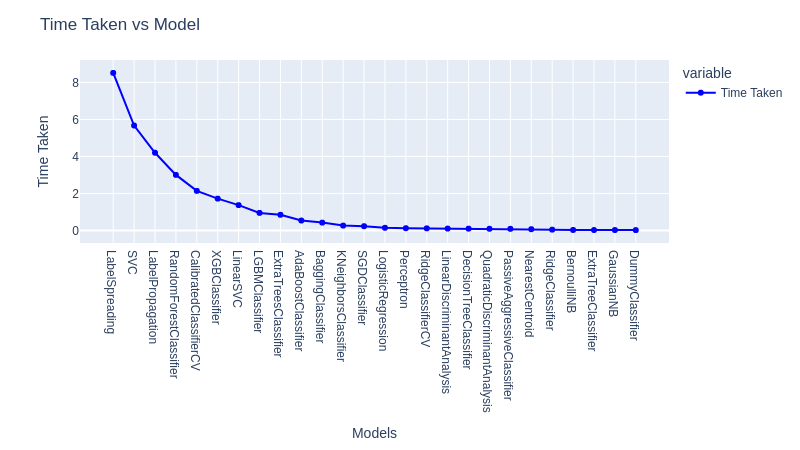

In [42]:
models.sort_values(by = 'Time Taken', inplace = True, ascending = False)
line = px.line(data_frame = models, y = ['Time Taken'], markers = True)
line.update_xaxes(title = 'Models', rangeslider_visible = False)
line.update_yaxes(title = 'Time Taken')
line.update_traces(line_color = 'blue')
line.update_layout(showlegend = True, title = {'text': 'Time Taken vs Model'})

gitly.show(line)

OBSERVATION : On the Accuracy part it is observed that XGBoost has been more accurate with value of 0.8675 , but on the other side based on the time  analysis GaussianNB has performed in  the lowest time with an accuracy of 0.8305 . 


# ** The Future scope of the model is to be more perfect ,  making it more accurate so it can be used in the Industrial Areas for analysis **